In [1]:
#Really need these
import pandas as pd 
import numpy as np
from numpy import *


#Handy for debugging
import gc
import time
import warnings
import os

#Date stuff
from datetime import datetime
from datetime import timedelta

#Do some statistics
from scipy import sparse
import scipy.stats as ss
import math
from scipy import stats
import statsmodels.api as sm

#Nice graphing tools
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls


In [88]:
#Machine learning tools
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import sparse
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

## Performance measures
from sklearn.metrics import mean_squared_error

# Import Datasets

In [3]:
data = pd.read_csv(r'C:\Users\amelia.quek\Documents\PDoc\WLM\train.csv')
stores = pd.read_csv(r'C:\Users\amelia.quek\Documents\PDoc\WLM\stores.csv')
features = pd.read_csv(r'C:\Users\amelia.quek\Documents\PDoc\WLM\features.csv')

### Training Dataset 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [5]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
data.shape

(421570, 5)

In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.00,11.00,22.00,33.0000,45.00
Dept,421570.0,44.260317,30.492054,1.00,18.00,37.00,74.0000,99.00
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36


### Stores Dataset

In [8]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [9]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


### Features Dataset

In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [11]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [12]:
features.shape

(8190, 12)

In [13]:
features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,8190.0,23.000000,12.987966,1.000,12.000000,23.000000,34.000000,45.000000
Temperature,8190.0,59.356198,18.678607,-7.290,45.902500,60.710000,73.880000,101.950000
Fuel_Price,8190.0,3.405992,0.431337,2.472,3.041000,3.513000,3.743000,4.468000
MarkDown1,4032.0,7032.371786,9262.747448,-2781.450,1577.532500,4743.580000,8923.310000,103184.980000
MarkDown2,2921.0,3384.176594,8793.583016,-265.760,68.880000,364.570000,2153.350000,104519.540000
MarkDown3,3613.0,1760.100180,11276.462208,-179.260,6.600000,36.260000,163.150000,149483.310000
MarkDown4,3464.0,3292.935886,6792.329861,0.220,304.687500,1176.425000,3310.007500,67474.850000
MarkDown5,4050.0,4132.216422,13086.690278,-185.170,1440.827500,2727.135000,4832.555000,771448.100000
CPI,7605.0,172.460809,39.738346,126.064,132.364839,182.764003,213.932412,228.976456
Unemployment,7605.0,7.826821,1.877259,3.684,6.634000,7.806000,8.567000,14.313000


## Features Dataset - Handling Missing Data 

In [14]:
#fill missing values with Median for CPI and Unemployment columns
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

In [15]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [16]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


## Merging Datasets (Training - Stores) & (Stores - Features) 

In [17]:
data = pd.merge(data,stores,on='Store',how='left')

In [18]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [19]:
data['Date'] = pd.to_datetime(data['Date'])

In [20]:
data.sort_values(by=['Date'],inplace=True)

In [21]:
data.set_index(data.Date, inplace=True)

In [22]:
data

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
Date,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,False,B,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,40,87,2012-10-26,24638.96,False,A,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145,False
2012-10-26,19,30,2012-10-26,3740.12,False,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False
2012-10-26,19,31,2012-10-26,3128.17,False,A,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992,False


In [23]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [24]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [25]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
2010-02-05,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False
2010-02-05,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.0,0.0,0.0,0.0,0.0,131.527903,10.064,False


In [26]:
#Split date column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week

C:\Users\amelia.quek\AppData\Local\Temp\ipykernel_33016\1046979987.py:4: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



## Detect Outliers and Abnormalities 

In [27]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [28]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [29]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.00,0.00,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,29,5,2010-02-05,15552.08,B,93638,24.36,2.788,0.00,0.00,...,10.064,False,2010,2,5,69467.35,6642.10,12931.821259,10898.36,8868.631880
2,29,6,2010-02-05,3200.22,B,93638,24.36,2.788,0.00,0.00,...,10.064,False,2010,2,5,26440.84,805.79,3289.884965,2684.12,3058.515710
3,29,7,2010-02-05,10820.05,B,93638,24.36,2.788,0.00,0.00,...,10.064,False,2010,2,5,99680.98,5642.05,16854.082238,13066.83,12955.930323
4,29,8,2010-02-05,20055.64,B,93638,24.36,2.788,0.00,0.00,...,10.064,False,2010,2,5,28478.15,16859.93,20680.465944,20490.17,1618.396782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,40,87,2012-10-26,24638.96,A,155083,49.65,3.917,3605.71,55.98,...,4.145,False,2012,10,43,32611.47,10340.81,20070.128951,19759.05,4609.595932
421566,19,30,2012-10-26,3740.12,A,203819,56.49,4.071,5430.75,90.07,...,7.992,False,2012,10,43,7748.41,2427.98,4690.908322,4682.44,1200.403367
421567,19,31,2012-10-26,3128.17,A,203819,56.49,4.071,5430.75,90.07,...,7.992,False,2012,10,43,9570.37,1790.78,3067.292937,2568.37,1450.166629
421568,19,33,2012-10-26,5740.14,A,203819,56.49,4.071,5430.75,90.07,...,7.992,False,2012,10,43,15008.92,2925.97,6206.423007,5674.61,2264.142811


In [30]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [31]:
#combine all markdowns to one column
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [32]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [33]:
data.shape

(421533, 20)

In [34]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
data.shape

(375438, 20)

#### Negative Weekly Sales 

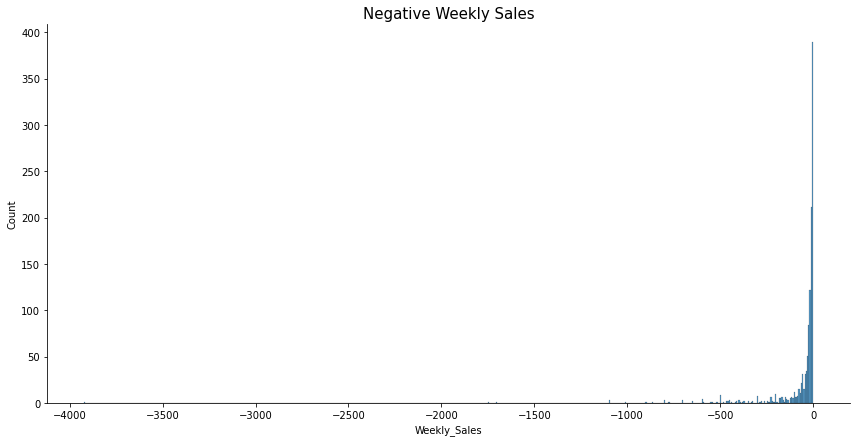

In [35]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()

In [36]:
data=data[data['Weekly_Sales']>=0]

In [37]:
data.shape

(374247, 20)

In [38]:
data['IsHoliday'] = data['IsHoliday'].astype('int')

In [39]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.480,9854.349032,0.00
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.050,290.954675,0.00
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.040,307.436056,0.00
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.970,756.223236,0.00
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.600,3874.176095,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,2,26,2012-10-26,9258.88,A,202307,69.79,3.506,223.078337,6.170,0,2012,10,43,19679.04,4179.99,9347.725105,8762.990,2825.107609,9678.80
2012-10-26,38,23,2012-10-26,53.12,C,39690,65.95,4.301,131.193097,10.199,0,2012,10,43,289.78,3.50,37.848679,31.365,34.065601,502.88
2012-10-26,27,6,2012-10-26,5339.65,A,204184,58.99,4.071,142.762411,8.000,0,2012,10,43,41005.33,2524.01,7730.729091,6798.780,5178.928257,10969.27


# Data Visualizations

#### Average Monthly Sales 

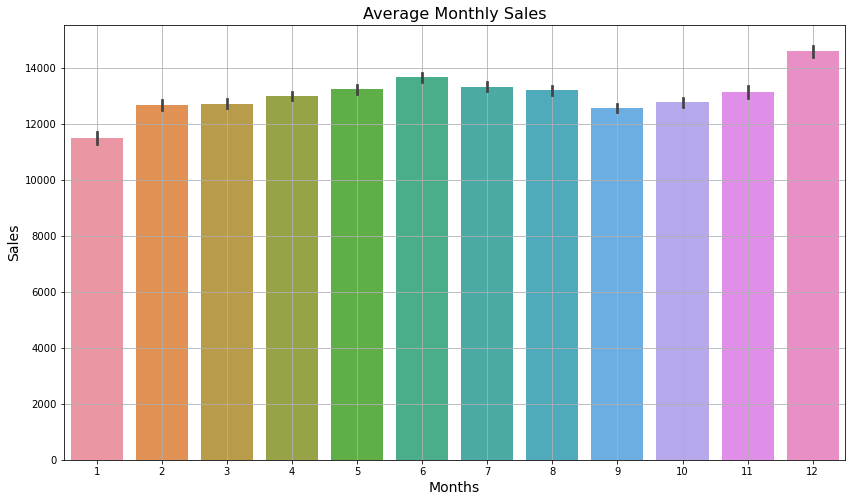

In [40]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

#### Monthly Sales for Each Year

In [41]:
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,8.915290e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


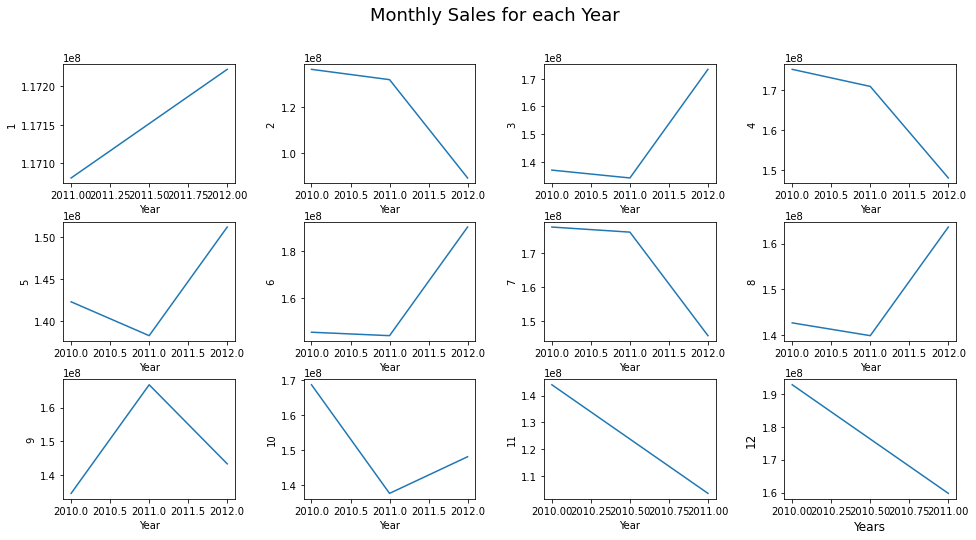

In [42]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.show()

#### Average Weekly Sales Store wise

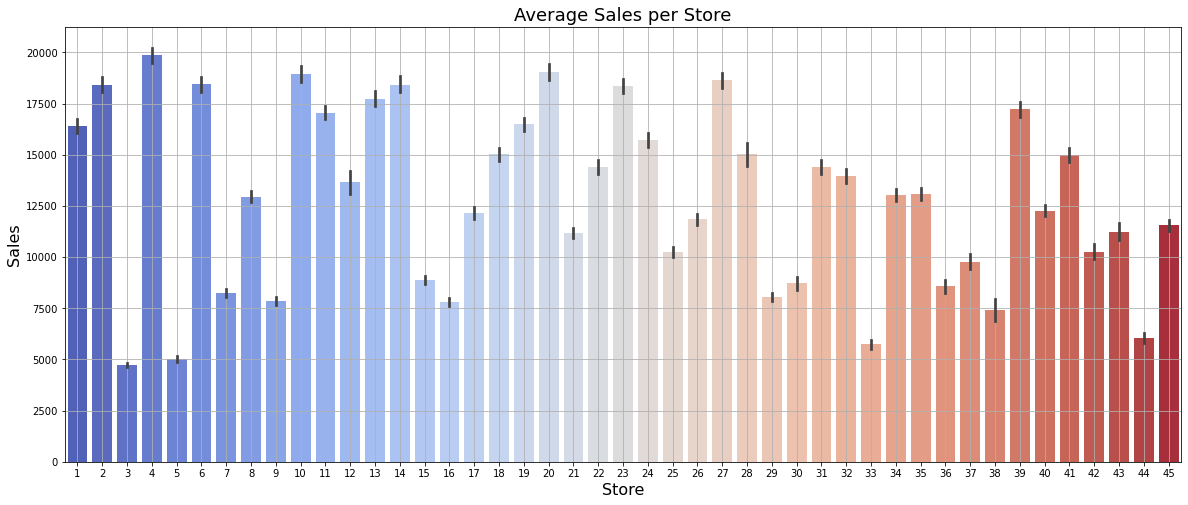

In [43]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data, palette='coolwarm')
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

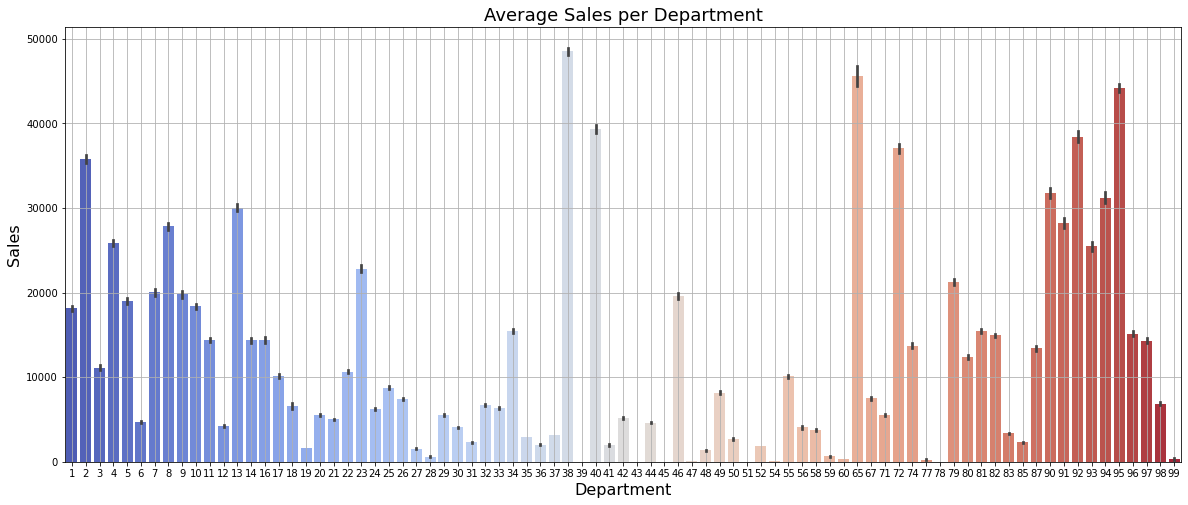

In [44]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data, palette='coolwarm')
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

#### Sales Vs Temperature 

C:\Users\amelia.quek\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



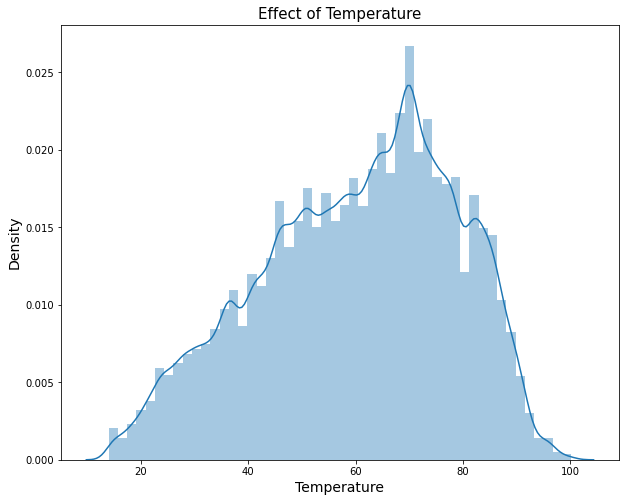

In [45]:
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

#### Holiday Distribution 

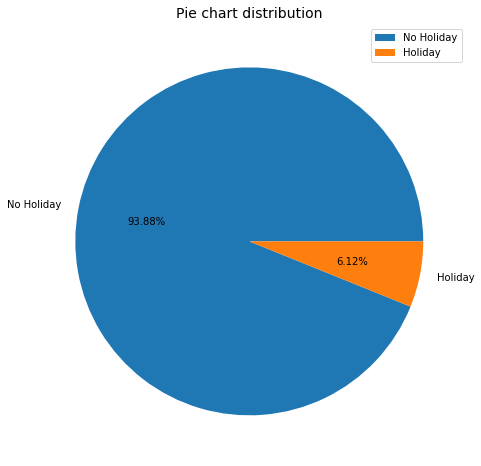

In [46]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

# Time Series Decompose

<Figure size 1440x1080 with 0 Axes>

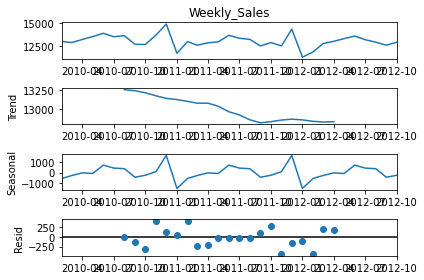

In [47]:
plt.figure(figsize=(20,15))
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.show()

# Normalizing Data and One Hot Encoding 

In [48]:
#One Hot Encoding
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()

In [49]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,2,26,A
2012-10-26,38,23,C
2012-10-26,27,6,A
2012-10-26,36,40,A
2012-10-26,45,98,B


In [50]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [51]:
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [52]:
data.shape

(374247, 20)

In [53]:
data = pd.concat([data, data_cat],axis=1)

In [54]:
data.shape

(374247, 149)

In [55]:
data.drop(columns=cat_col,inplace=True)

In [56]:
data.drop(columns=['Date'],inplace=True)

In [57]:
data.shape

(374247, 145)

In [58]:
#Normalize Data
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI',
           'Unemployment','Total_MarkDown','max','min','mean','median','std']

In [59]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [60]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


In [61]:
data = normalization(data.copy(),num_col)

In [62]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0.630267,0.328495,0.0501,0.840500,0.508787,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.009188,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,1,0,0,0,1,0
2010-02-05,0.009537,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.118953,0.650636,0.233627,0.0501,0.873861,0.291286,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.152888,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


# Correlation

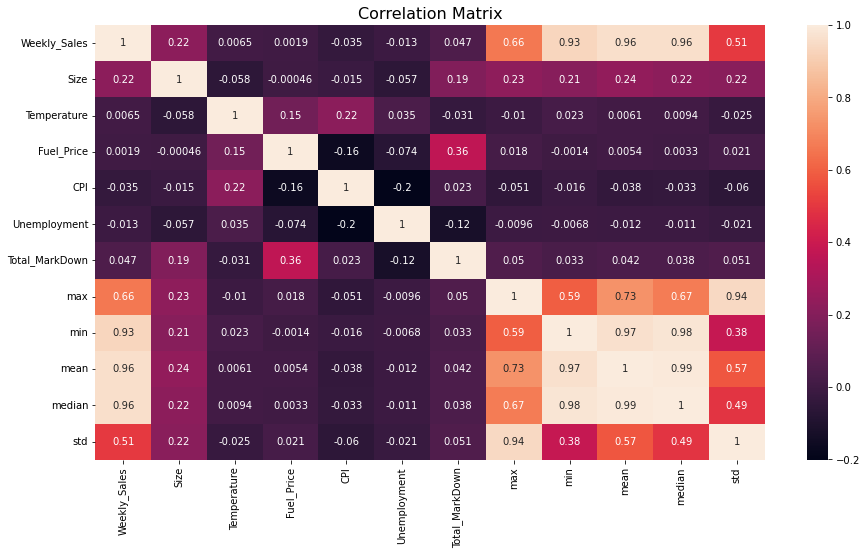

In [63]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

# Feature Elimination

In [64]:
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'Type_B', 'Type_C', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=144)

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
#param_grid={'n_estimators':np.arange(10,25)}
#tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=5)
#tree.fit(data_train[feature_col],data_train['Weekly_Sales'])

In [67]:
#tree.best_params_
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data[feature_col], data['Weekly_Sales'])

C:\Users\amelia.quek\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



RandomForestRegressor(n_estimators=23, oob_score=True)

In [68]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,median,5.817007e-01
1,2,mean,3.463916e-01
2,3,Week,1.972054e-02
3,4,Temperature,8.718280e-03
4,5,max,6.038180e-03
...,...,...,...
139,140,Dept_51,2.817106e-10
140,141,Dept_45,1.954941e-10
141,142,Dept_78,2.461079e-12
142,143,Dept_39,9.051673e-13


In [69]:
x=feature_rank.loc[0:22,['feature']]
x=x['feature'].tolist()
print(x)

['median', 'mean', 'Week', 'Temperature', 'max', 'CPI', 'Fuel_Price', 'min', 'Unemployment', 'std', 'Month', 'Total_MarkDown', 'Dept_16', 'IsHoliday', 'Dept_3', 'Dept_18', 'Size', 'Dept_1', 'Dept_11', 'Year', 'Dept_9', 'Dept_5', 'Dept_56']


In [70]:
X = data[x]
Y = data['Weekly_Sales']

In [71]:
data = pd.concat([X,Y],axis=1)

In [72]:
data

,median,mean,Week,Temperature,max,CPI,Fuel_Price,min,Unemployment,std,...,Dept_3,Dept_18,Size,Dept_1,Dept_11,Year,Dept_9,Dept_5,Dept_56,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.173215,0.208157,5,0.328495,0.088635,0.840500,0.050100,0.253530,0.508787,0.138276,...,0,0,0.630267,1,0,2010,0,0,0,0.342576
2010-02-05,0.004767,0.004499,5,0.278565,0.001180,0.875680,0.050100,0.064648,0.305248,0.004083,...,0,0,0.492338,0,0,2010,0,0,0,0.009188
2010-02-05,0.008968,0.009135,5,0.278565,0.003866,0.875680,0.050100,0.066212,0.305248,0.004314,...,0,0,0.492338,0,0,2010,0,0,0,0.009537
2010-02-05,0.086290,0.085594,5,0.233627,0.018453,0.873861,0.050100,0.161046,0.291286,0.010611,...,0,0,0.650636,0,0,2010,0,0,0,0.118953
2010-02-05,0.071542,0.080242,5,0.278565,0.044887,0.875680,0.050100,0.126993,0.305248,0.054362,...,0,0,0.492338,0,0,2010,0,0,0,0.152888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.082590,0.087055,43,0.647585,0.030286,0.958935,0.518036,0.119050,0.275758,0.039642,...,0,0,0.906277,0,0,2012,0,0,0,0.127259
2012-10-26,0.001617,0.001419,43,0.602996,0.000446,0.050698,0.916333,0.064822,0.760713,0.000478,...,0,0,0.026063,0,0,2012,0,0,0,0.000730
2012-10-26,0.064375,0.072181,43,0.522178,0.063107,0.165055,0.801102,0.097548,0.496028,0.072670,...,0,0,0.916437,0,0,2012,0,0,0,0.073391


## Data Split 

In [73]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=101)

## Linear Regression Model 

In [75]:
lr = LinearRegression(normalize=False)
lr.fit(X_train, y_train)

C:\Users\amelia.quek\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.



LinearRegression(normalize=False)

In [76]:
lr_acc = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",lr_acc)

Linear Regressor Accuracy -  92.20301783564696


In [77]:
y_pred = lr.predict(X_test)

In [78]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.03014326721356397
MSE 0.0035033551389700166
RMSE 0.0591891471383903
R2 0.9220304486833025


In [79]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df

,Actual,Predicted
Date,,
2010-05-07,0.056675,0.069456
2010-09-24,0.124174,0.261261
2011-01-21,0.029550,0.025183
2011-02-11,0.120401,0.133430
2011-02-04,0.863711,0.916040
...,...,...
2010-04-02,0.014976,0.017179
2011-10-14,0.527350,0.550946
2012-05-11,0.924026,0.667194


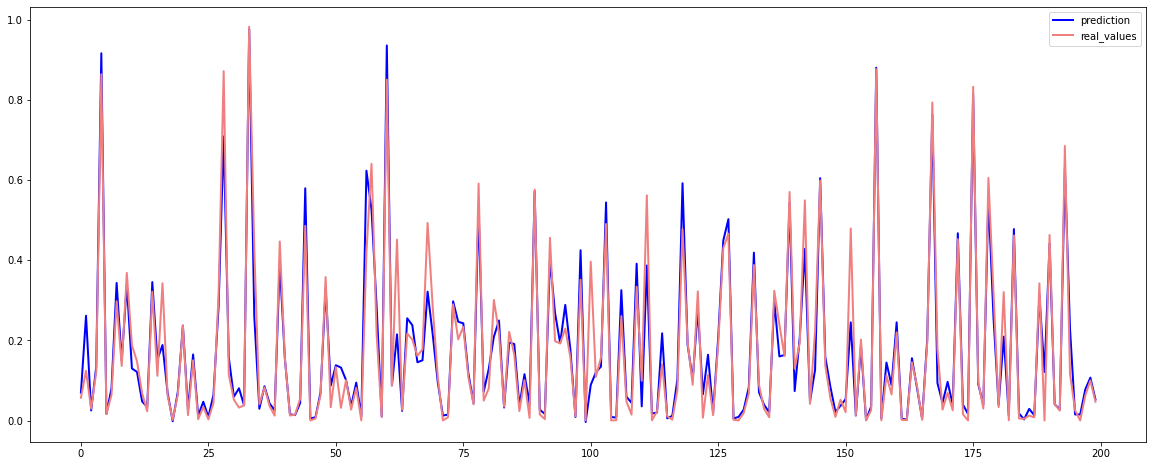

In [80]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

## Random Forest Model 

In [81]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [82]:
rf_acc = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.87672549962828


In [83]:
y_pred = rf.predict(X_test)


In [84]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.015592142936790475
MSE 0.0009540338140479097
RMSE 0.030887437803222034
R2 0.9787688977691595


In [85]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df

,Actual,Predicted
Date,,
2010-05-07,0.056675,0.069160
2010-09-24,0.124174,0.114370
2011-01-21,0.029550,0.030660
2011-02-11,0.120401,0.114268
2011-02-04,0.863711,0.930834
...,...,...
2010-04-02,0.014976,0.013953
2011-10-14,0.527350,0.599978
2012-05-11,0.924026,0.863179


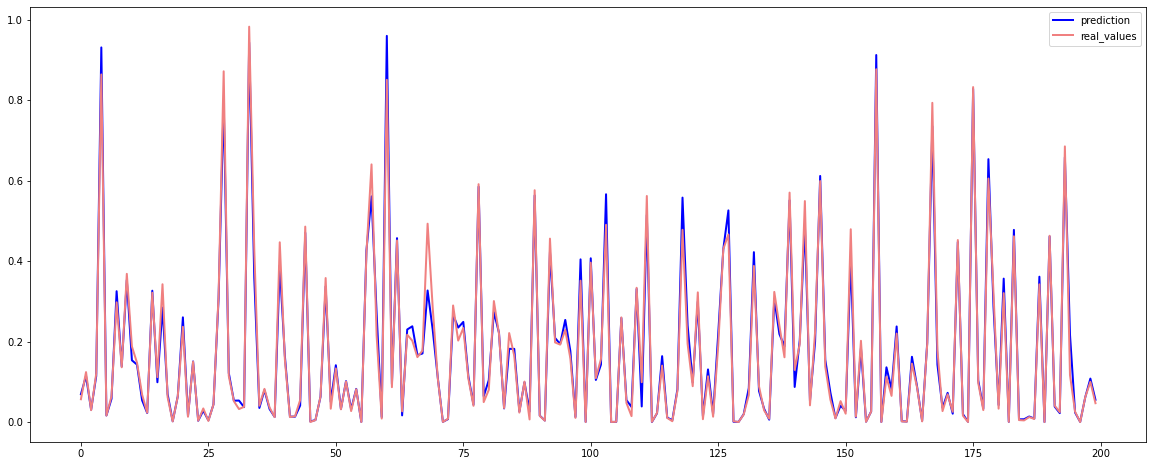

In [86]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

## K Neighbors Regressor Model 

In [89]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [90]:
knn_acc = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_acc)

KNeigbhbors Regressor Accuracy -  91.83811215181763


In [91]:
y_pred = knn.predict(X_test)

In [92]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.03326889710811461
MSE 0.003667315268124543
RMSE 0.06055836249540226
R2 0.9185846120085557


In [93]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df

,Actual,Predicted
Date,,
2010-05-07,0.056675,0.060723
2010-09-24,0.124174,0.065509
2011-01-21,0.029550,0.033928
2011-02-11,0.120401,0.088566
2011-02-04,0.863711,0.987874
...,...,...
2010-04-02,0.014976,0.015057
2011-10-14,0.527350,0.407583
2012-05-11,0.924026,0.586017


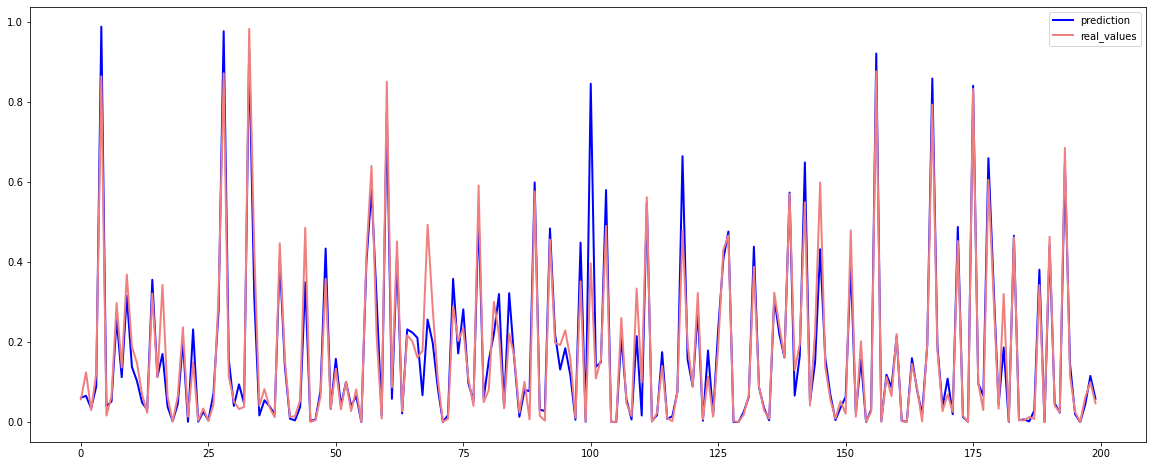

In [94]:
plt.figure(figsize=(20,8))
plt.plot(knn.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

## XGboost Model 

In [95]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

C:\Users\amelia.quek\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [96]:
xgb_acc = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgb_acc)

XGBoost Regressor Accuracy -  97.25323867550162


In [97]:
y_pred = xgbr.predict(X_test)

In [98]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.019985768648643553
MSE 0.0012341801223684063
RMSE 0.03513089982292521
R2 0.9725326984903381


In [99]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df

,Actual,Predicted
Date,,
2010-05-07,0.056675,0.069554
2010-09-24,0.124174,0.100273
2011-01-21,0.029550,0.023228
2011-02-11,0.120401,0.115232
2011-02-04,0.863711,0.918712
...,...,...
2010-04-02,0.014976,0.011717
2011-10-14,0.527350,0.565705
2012-05-11,0.924026,0.750058


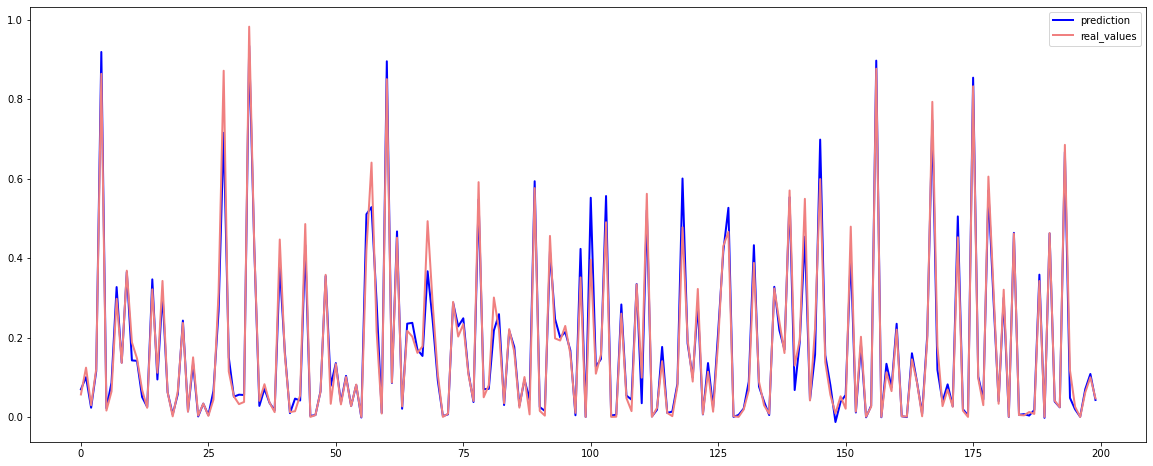

In [100]:
plt.figure(figsize=(20,8))
plt.plot(xgbr.predict(X_test[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

## Comparing Model 

In [103]:
acc = {'model':['lr_acc','rf_acc','knn_acc','xgb_acc'],'accuracy':[lr_acc,rf_acc,knn_acc,xgb_acc]}

In [104]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,lr_acc,92.203018
1,rf_acc,97.876725
2,knn_acc,91.838112
3,xgb_acc,97.253239


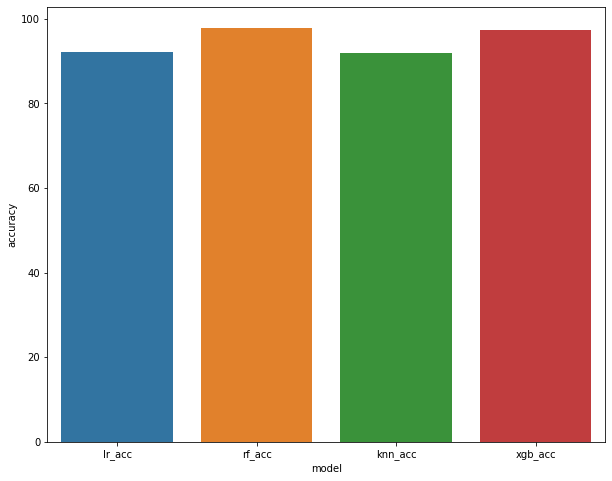

In [107]:
plt.figure(figsize=(10,8))
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.show()